# Decision Tree 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import graphviz
import pydotplus
import os
from pathlib import Path

In [2]:
# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# General Preperations

Handle 3 kinds of datasets:

1. df- all the instances when the label is "Kukumbo?" column.
1. df_gender - all the instances when the label is "Gender" column.
1. df_singles - only instances with current_status != singles when the label is "Kukumbo?"

In [3]:
# read clean data 
df = pd.read_csv('K_clean_data.csv')

df_gender = df.copy()

#change labels from 0, 1 to No, Yes 
df['Kukumbo?'].replace([0,1], ['No', 'Yes'], inplace=True)

# change labels from 0,1 to Female, Male
df_gender['Gender'].replace([0,1], ['Female', 'Male'], inplace=True)

# only singles- data
df_singles = df[df['Current_status'] > 0]

In [4]:
df

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
0,0,2,0,2,0,0,2,3,3,3,...,0,0,0,0,0,0,1,1,0,Yes
1,0,2,1,1,0,2,1,3,1,2,...,0,2,1,1,0,0,0,0,1,Yes
2,0,2,1,1,0,0,1,2,1,3,...,0,1,1,0,0,0,1,1,1,No
3,2,2,1,1,2,2,1,3,4,1,...,0,1,0,0,0,0,1,0,0,Yes
4,0,2,0,2,2,2,2,2,3,5,...,0,2,0,1,0,1,0,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,2,1,1,2,2,2,3,2,3,...,0,3,1,0,0,0,0,0,0,Yes
408,2,2,0,2,2,2,3,3,4,4,...,0,0,0,0,0,1,1,0,0,Yes
409,0,2,0,2,2,2,1,4,3,1,...,0,1,0,1,0,0,0,0,1,Yes
410,0,2,0,3,0,0,3,4,2,2,...,0,0,0,0,0,1,1,0,0,No


In [5]:
df_singles

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
3,2,2,1,1,2,2,1,3,4,1,...,0,1,0,0,0,0,1,0,0,Yes
4,0,2,0,2,2,2,2,2,3,5,...,0,2,0,1,0,1,0,1,1,Yes
9,0,2,1,1,2,0,2,3,4,3,...,0,1,0,1,0,1,1,1,0,Yes
12,0,2,1,1,1,0,3,4,3,3,...,0,1,1,0,1,0,0,1,1,Yes
14,0,1,1,1,2,2,3,5,5,2,...,0,1,1,0,0,0,0,0,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0,2,0,2,2,2,0,4,4,5,...,0,2,1,1,0,0,0,1,0,Yes
407,0,2,1,1,2,2,2,3,2,3,...,0,3,1,0,0,0,0,0,0,Yes
408,2,2,0,2,2,2,3,3,4,4,...,0,0,0,0,0,1,1,0,0,Yes
409,0,2,0,2,2,2,1,4,3,1,...,0,1,0,1,0,0,0,0,1,Yes


In [6]:
df_gender

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
0,0,2,Female,2,0,0,2,3,3,3,...,0,0,0,0,0,0,1,1,0,1
1,0,2,Male,1,0,2,1,3,1,2,...,0,2,1,1,0,0,0,0,1,1
2,0,2,Male,1,0,0,1,2,1,3,...,0,1,1,0,0,0,1,1,1,0
3,2,2,Male,1,2,2,1,3,4,1,...,0,1,0,0,0,0,1,0,0,1
4,0,2,Female,2,2,2,2,2,3,5,...,0,2,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,2,Male,1,2,2,2,3,2,3,...,0,3,1,0,0,0,0,0,0,1
408,2,2,Female,2,2,2,3,3,4,4,...,0,0,0,0,0,1,1,0,0,1
409,0,2,Female,2,2,2,1,4,3,1,...,0,1,0,1,0,0,0,0,1,1
410,0,2,Female,3,0,0,3,4,2,2,...,0,0,0,0,0,1,1,0,0,0


In [7]:
df.columns

Index(['Location', 'Age', 'Gender', 'Interested_in', 'Current_status',
       'Usually', 'Confidence', 'Bars', 'Social_network', 'Dating apps',
       'Through_a_friend', 'Street', 'experience', 'frequently_use', 'paid',
       'swipes_are', 'look_for_Short_term', 'look_for_Long_term', 'Tinder',
       'Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo', 'num_apps',
       'use_for_Long_term', 'use_for_Short_term', 'use_for_Friends',
       'affraid_bad_people', 'not_seen_there', 'too_much_not_myType',
       'cannot_find_somebody_I_like', 'Kukumbo?'],
      dtype='object')

## Generate arbitrary model benchmark

In [8]:
def print_benchmark_performance(y_pred_test, y_test, classes):
    num_instances = len(y_pred_test)
    p = len(y_pred_test[y_pred_test == classes[1]]) / num_instances
    y = []
    for i in range(num_instances):
        if np.random.random() < p:
            y.append(classes[1])
        else:
            y.append(classes[0])
            
            
    y = np.array(y)
    print()
    print('benchmark confusion matrix')
    print_matrix(y, y_test)

## Statistical analysis

In [9]:
cor_mat_df = df[['Age','Gender','Interested_in','Current_status','Usually','Confidence',
                 'Bars','Social_network','Dating apps','Through_a_friend','Street',
                 'experience','frequently_use','paid','swipes_are','look_for_Short_term','look_for_Long_term',
                 'Tinder','Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo','num_apps',
                 'use_for_Long_term','use_for_Short_term','use_for_Friends',
                 'affraid_bad_people','not_seen_there','too_much_not_myType','cannot_find_somebody_I_like','Kukumbo?']]
corr_matrix = cor_mat_df.corr(method='pearson')

In [10]:
#save to pdf
corr_matrix.to_csv('corrolation_matrix.csv')   

In [11]:
rows = 'Gender'
df_singles[[rows,'affraid_bad_people','not_seen_there','too_much_not_myType','cannot_find_somebody_I_like']].groupby(rows, as_index=False).mean().sort_values(by=rows, ascending=True)

,Gender,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like
0,0,0.341667,0.400000,0.416667,0.316667
1,1,0.148148,0.266667,0.459259,0.481481


## Preperation - General function

In [12]:
# lablel = Kukumbo 
# all data , all features 

X = df.drop('Kukumbo?',axis=1)
y = pd.DataFrame(df['Kukumbo?'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
# label = Kukumbo 
# only singeles, all features
X_singles = df_singles.drop('Kukumbo?',axis=1)
y_singles = pd.DataFrame(df_singles['Kukumbo?'])
X_train_singles, X_test_singles, y_train_singles, y_test_singles = train_test_split(
    X_singles, y_singles, test_size=0.3, random_state=1)

In [14]:
train = pd.concat([X_train,y_train],axis=1)
train_singles = pd.concat([X_train_singles,y_train_singles],axis=1)
classes = np.unique(y_train)

In [15]:
def plot_accuracy(train_acc, test_acc):
    """
    Plot the acuuracy of the given training and test lists.
    
    Inputs:
    
    train_acc - list of train accuracy
    test_acc - list of test accuracy
    """
    ds = list(range(1, len(train_acc)+1))
    plt.scatter(ds,train_acc, s=10,label='Train')
    plt.scatter(ds,test_acc, s=10,label='Test')
    plt.xlabel('Max-depth',fontsize=15)
    plt.ylabel('Accuracy',fontsize=15)
    plt.title('Accuracy as a function of max-depth on train & test data',fontsize=15)
    plt.legend(fontsize=15)
    plt.grid(axis='y')
    plt.show()

In [16]:
def build_tree(X_train, X_test=None, y_train=y_train, y_test=y_test, max_d=5,dir_name=None, to_pdf=True, to_plot=False, classes=classes):
    """
    Construct a decision tree from max_depth=1 until the given max_depth. 
    Export to pdf (if not exist) according to the given boolean "to_pdf".
    Plot accuracy according to the given boolean "to_plot"
    
    Inputs:
    X_train - training data set
    X_test - test data set 
    y_train - labels of the training 
    y_test - label of the test 
    max_d - max_depth to consider
    dir_name - name of direction to create(only if export pdf).
    to_pdf - boolean. True - export to pdf, otherwise not export.
    to_plot - boolean. True - plot accuracy.
    classes - labels optional values.
    
    Returns:
    y_pred_test_best - when to_plot is True then return the best prediction results of the tree on the test set. 
    
    """
    train_acc = list()
    test_acc = list()
    ds = range(1,max_d)
    best_acc_test = -1
    
    if to_pdf:
        # make dir only if not exist
        if not Path(dir_name).is_dir():
            make_dir(dir_name)

    for d in ds:
        clf = DecisionTreeClassifier(max_depth=d)
        clf.fit(X_train,y_train)
        y_pred_train = clf.predict(X_train)
        
        if to_pdf and d < 5:
            # create a graph
            dot_data = tree.export_graphviz(clf, out_file=None, 
                                           feature_names=list(X_train.columns),
                                           class_names=list(classes),
                                           filled=True)
            graph = pydotplus.graph_from_dot_data(dot_data)
        
            #save to pdf ( if not exists)
            if not Path(dir_name, f'{dir_name}_tree_{d}.pdf'):
                graph.write_pdf(f'{dir_name}_tree_{d}.pdf')
        
        if to_plot:
            y_pred_test = clf.predict(X_test)
            
            train_acc.append(accuracy_score(y_train, y_pred_train))
            cur_acc_test = accuracy_score(y_test, y_pred_test)
            test_acc.append(cur_acc_test)
            
            if cur_acc_test > best_acc_test:
                y_pred_test_best = y_pred_test
                best_acc_test = cur_acc_test
    if to_plot:    
        plot_accuracy(train_acc, test_acc)
        return y_pred_test_best

In [17]:
def make_dir(dir_name):
    """
    Make a dir with the given name.
    
    Input:
    dir name - a name who does not exists in the current dictonary. 
    """
    # Parent Directory path
    parent_dir = os.path.dirname(os.path.realpath('DT.ipnb'))
  
    # Path
    path = os.path.join(parent_dir, dir_name)
  
    # Create the directory
    os.mkdir(path)

In [18]:
def print_matrix(pred, true):
    """
    Print the indices - Accuracy, Sensitivity, Specificity, Precision of the given pred and actual lists. 
    
    Input: 
    
    pred - list of labels, that the decision tree predict.
    true - list of the actual labels of the data set.
    
    """
    tn, fp, fn, tp = confusion_matrix(y_pred=pred, y_true=true) .ravel()
    accuracy = (tp + tn) / (tn + fp + fn + tp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    print(f'Accuracy: {accuracy * 100:.2f}%\n'
          f'Sensitivity: {sensitivity * 100:.2f}%\n'
          f'Specificity: {specificity * 100:.2f}%\n'
          f'Precision: {precision * 100:.2f}%'
         )

# Prediction

first we try to predict who will use Kukumbo.

In [19]:
classes = ['No', 'Yes']

# All Samples

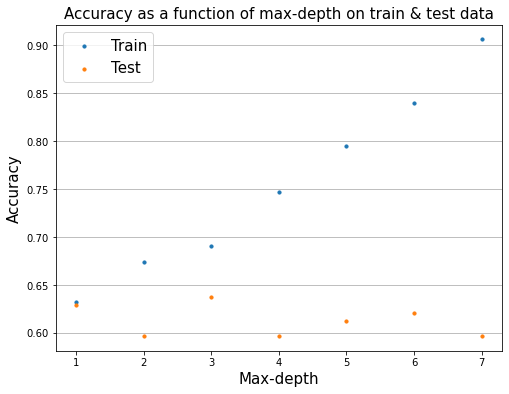

Accuracy: 63.71%
Sensitivity: 78.21%
Specificity: 39.13%
Precision: 68.54%

benchmark confusion matrix
Accuracy: 58.06%
Sensitivity: 69.23%
Specificity: 39.13%
Precision: 65.85%


In [20]:
# Train a DT on the data
y_pred_test = build_tree(X_train=X_train, X_test=X_test, max_d=8, to_pdf=False, to_plot=True)
print_matrix(y_pred_test, y_test)
print_benchmark_performance(y_pred_test, y_test, classes)

# Singles "Only"

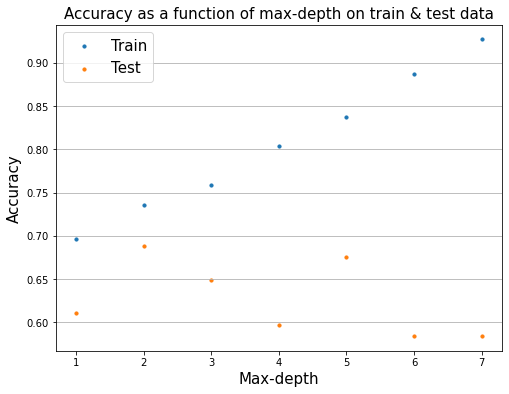

Accuracy: 68.83%
Sensitivity: 79.63%
Specificity: 43.48%
Precision: 76.79%

benchmark confusion matrix
Accuracy: 68.83%
Sensitivity: 83.33%
Specificity: 34.78%
Precision: 75.00%


In [21]:
# Train a DT on the data of the singles only
y_pred_test = build_tree(X_train=X_train_singles, y_train=y_train_singles, X_test=X_test_singles, y_test=y_test_singles,
           max_d=8, to_pdf=False, to_plot=True)
print_matrix(y_pred_test, y_test_singles) 
print_benchmark_performance(y_pred_test, y_test_singles, classes)

# Descriptive Analysis

In [22]:
def importance_features(classifier, TrainingData):
    #21 Preprocess and sort the features by importance
    ImportanceList = (classifier.feature_importances_)
    cols = TrainingData.columns
    TuppleList = zip(cols,ImportanceList)    
    TuppleList = sorted(TuppleList, key = lambda x: x[1])  
    OrderedClasses = []
    for tup in TuppleList:
        OrderedClasses.append(tup[0])
    ImportanceList = sorted(ImportanceList)

    #21 Show a bar chart for feature importances
    plt.title('Feature Importance Graph')
    plt.bar(OrderedClasses, ImportanceList)
    plt.xticks(OrderedClasses, rotation = 90)
    plt.ylabel('Importance')
    plt.show()

# All Samples

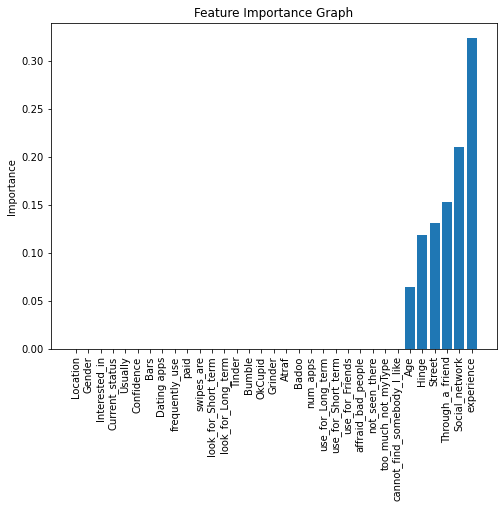

In [23]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
importance_features(clf, X_train)

# Singles "Only"

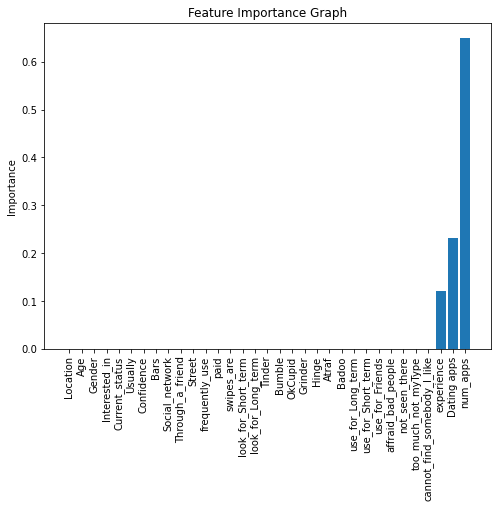

In [24]:
clf_singles = DecisionTreeClassifier(max_depth=2)
clf_singles.fit(X_train_singles,y_train_singles)
importance_features(clf_singles, X_train_singles)

We export trees to pdf and analyze them to get known about strong features and see behaviour and traet of the trees. 

Since our main goal is not to predict. We want only to find strong features and information about what happen in the market we split to 2 cases:
- build tree of all data
- bulid tree by 70% train and 30% test

In [25]:
# work with train and test 
X_train_noExp = X_train.drop(columns=['experience'])
X_test_noExp = X_test.drop(columns=['experience'])

# work on all data 
X_all_noExp = X.drop(columns=['experience'])

In [26]:
build_tree( X_train= X_all_noExp, y_train = y, max_d=5, dir_name = 'all_data_noExp', to_pdf=True, to_plot=False)

## Singles "Only"

In [28]:
build_tree(X_train=X_singles, y_train = y_singles, max_d=5, dir_name = 'all_data_no_Location', to_pdf=False, to_plot=False)